# Plot CSON

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import cartopy
import cartopy.crs as ccrs

import cmocean

import roms_tools as rt
from cson_forge import catalog

In [5]:
df = catalog.blueprint.load(stage="postconfig")
df

,model_name,grid_name,blueprint_name,description,start_time,end_time,np_eta,np_xi,grid_kwargs,blueprint_path,grid_yaml_path,input_data_dir,stage
0,cson_roms-marbl_v0.1,ccs-12km,cson_roms-marbl_v0.1_ccs-12km,California Current System,2024-01-01T00:00:00,2024-01-02T00:00:00,20,16,"{'nx': 224, 'ny': 440, 'size_x': 2688, 'size_y...",/Users/mclong/codes/cson-forge/cson_forge/blue...,/Users/mclong/codes/cson-forge/cson_forge/blue...,/Users/mclong/cson-forge-data/input-data/cson_...,postconfig
1,cson_roms-marbl_v0.1,gulf-guinea-toy,cson_roms-marbl_v0.1_gulf-guinea-toy,Gulf of Guinea (toy),2012-01-01T00:00:00,2012-01-02T00:00:00,5,2,"{'nx': 10, 'ny': 10, 'size_x': 4000, 'size_y':...",/Users/mclong/codes/cson-forge/cson_forge/blue...,/Users/mclong/codes/cson-forge/cson_forge/blue...,/Users/mclong/cson-forge-data/input-data/cson_...,postconfig
2,cson_roms-marbl_v0.1,hvalfjörður-0,cson_roms-marbl_v0.1_hvalfjörður-0,"Hvalfjörður, Iceland",2024-01-01T00:00:00,2024-01-02T00:00:00,16,16,"{'nx': 512, 'ny': 384, 'size_x': 1280, 'size_y...",/Users/mclong/codes/cson-forge/cson_forge/blue...,/Users/mclong/codes/cson-forge/cson_forge/blue...,/Users/mclong/cson-forge-data/input-data/cson_...,postconfig
3,cson_roms-marbl_v0.1,test-tiny,cson_roms-marbl_v0.1_test-tiny,Test tiny,2012-01-01T00:00:00,2012-01-02T00:00:00,1,2,"{'nx': 6, 'ny': 2, 'size_x': 500, 'size_y': 10...",/Users/mclong/codes/cson-forge/cson_forge/blue...,/Users/mclong/codes/cson-forge/cson_forge/blue...,/Users/mclong/cson-forge-data/input-data/cson_...,postconfig
4,cson_roms-marbl_v0.1,wio-toy,cson_roms-marbl_v0.1_wio-toy,Western Indian Ocean (toy),2012-01-01T00:00:00,2012-01-02T00:00:00,5,2,"{'nx': 20, 'ny': 20, 'size_x': 8000, 'size_y':...",/Users/mclong/codes/cson-forge/cson_forge/blue...,/Users/mclong/codes/cson-forge/cson_forge/blue...,/Users/mclong/cson-forge-data/input-data/cson_...,postconfig


In [ ]:
grids = {}
for _, row in df.iterrows():
    name = row["grid_name"]
    grid_yaml_path = row["grid_yaml_path"]
    grids[name] = rt.Grid.from_yaml(grid_yaml_path)

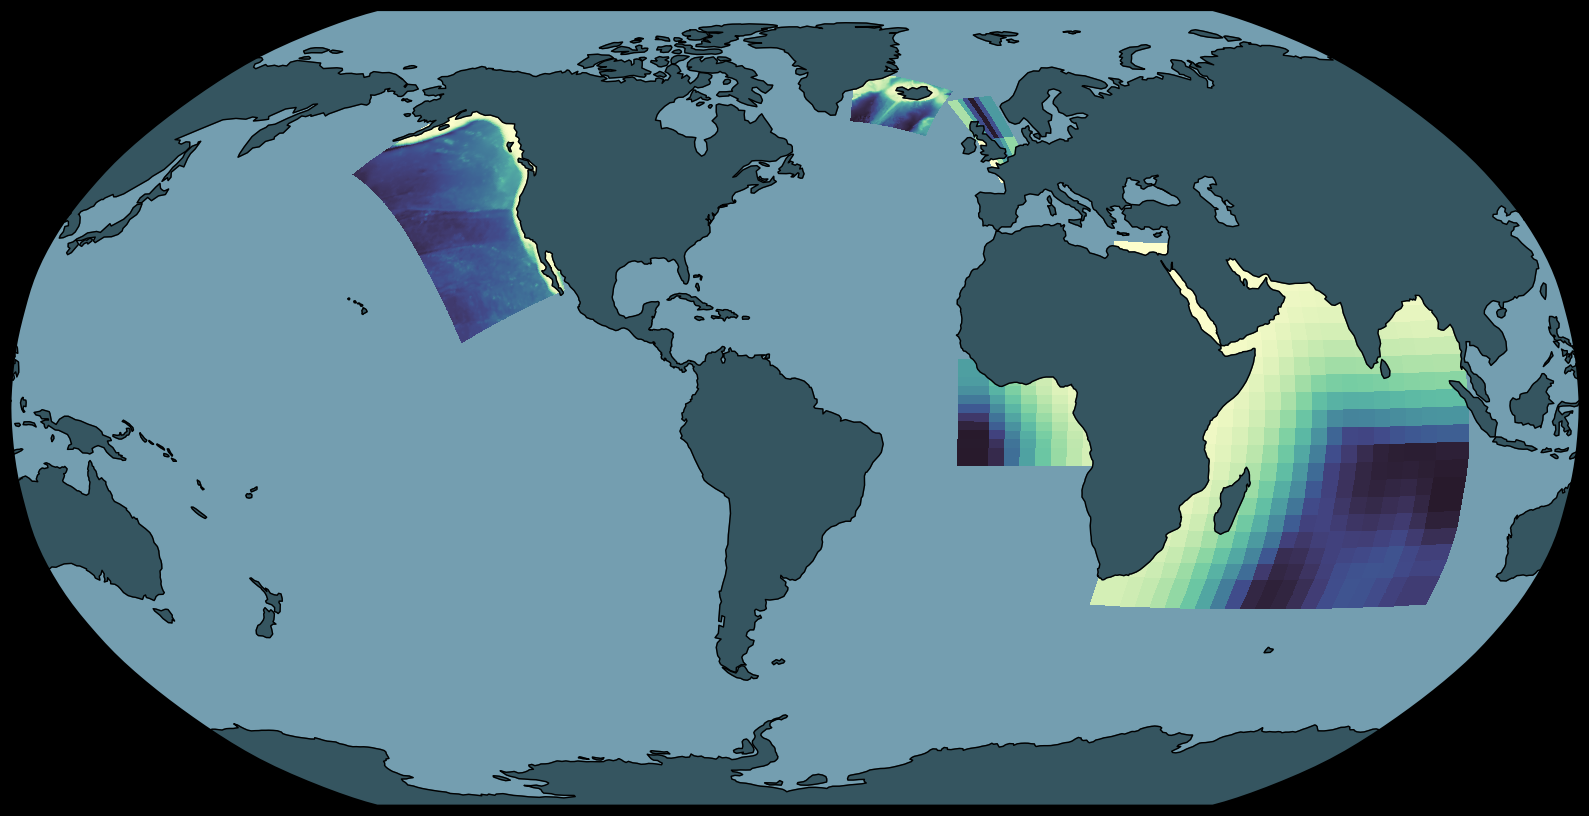

In [7]:
prj = ccrs.Robinson(central_longitude=305.0)

fig, ax = plt.subplots(
    figsize=(12, 12),
    facecolor='k',
    subplot_kw=dict(projection=prj),
)

ocean = ax.add_feature(
    cartopy.feature.NaturalEarthFeature(
        'physical','ocean','110m',
        edgecolor='face',
        facecolor='#749EB0',
        zorder=-9999,
    )
)

land = ax.add_feature(
     cartopy.feature.NaturalEarthFeature(
         'physical','land','110m',
         edgecolor='face',
         facecolor='#355560'
     )
 )

ax.coastlines()

ax.spines['geo'].set_visible(True)
ax.spines['geo'].set_linewidth(2)
ax.spines['geo'].set_edgecolor('black')

for g in grids.values():
    ax.pcolormesh(
        g.ds.lon_rho, g.ds.lat_rho, g.ds.h, 
        #edgecolors='k', linewidth=0.25,
        transform=ccrs.PlateCarree(),
        cmap=cmocean.cm.deep,
    )
    
ax.set_global() # For a global map

fig_size = (16, 9)
fig.set_size_inches(fig_size)
fig.tight_layout()

fig.savefig('assets/cson.png', dpi=300, transparent=True)
   

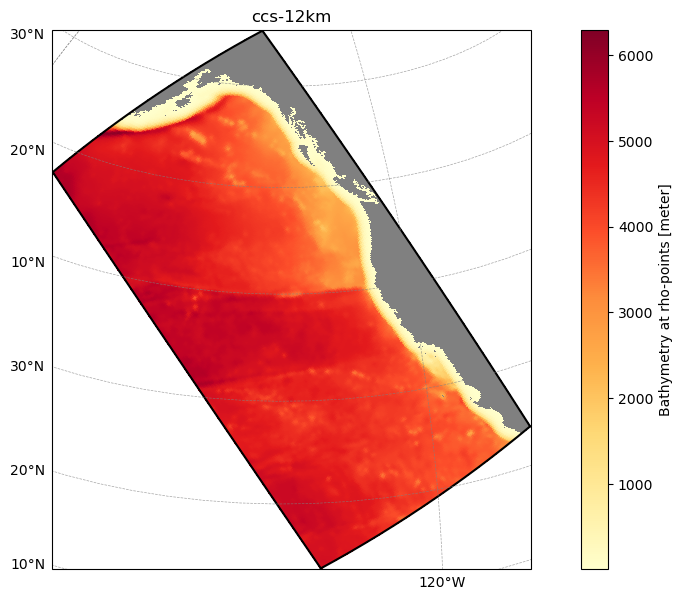

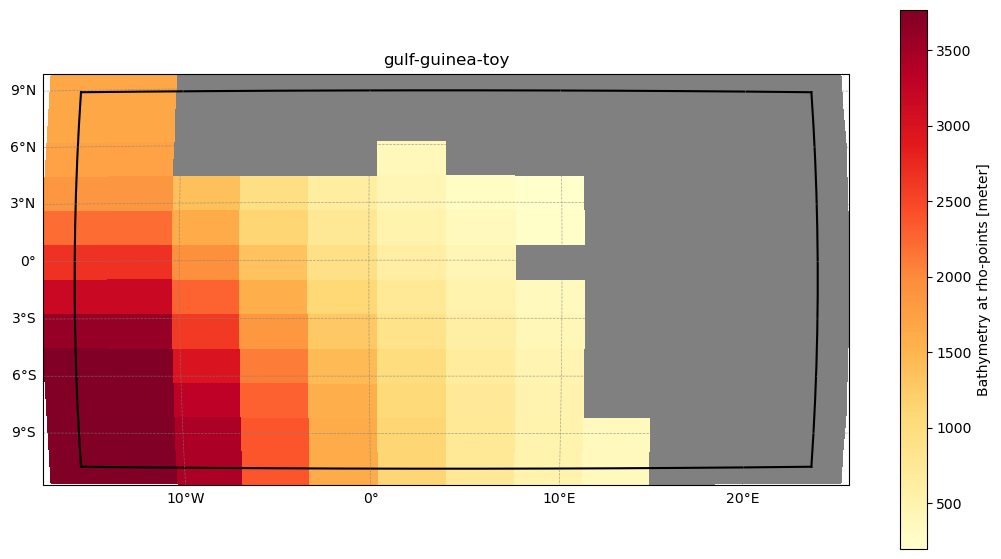

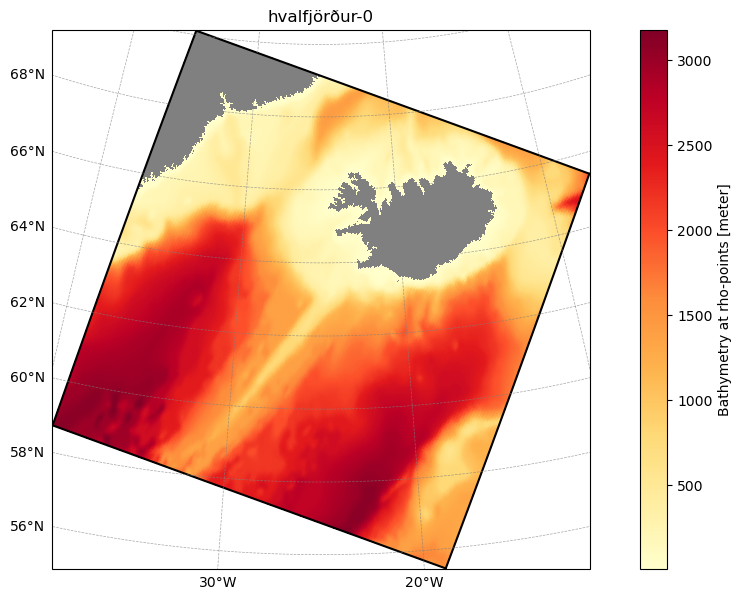

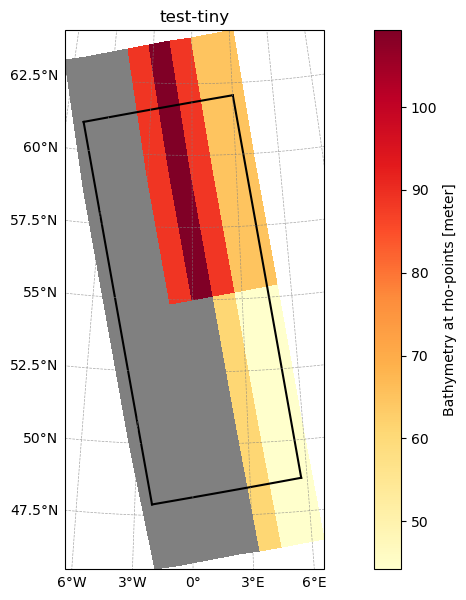

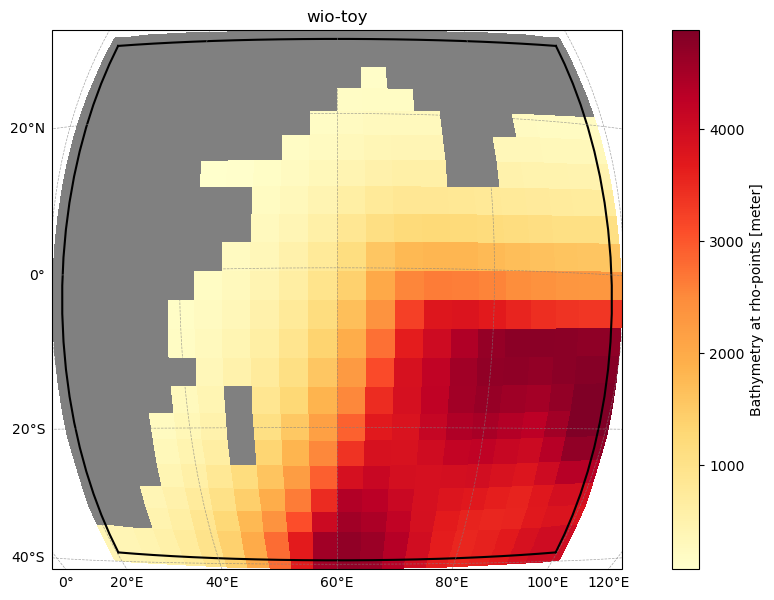

In [8]:
for name, g in grids.items():
    rt.plot.plot(g.ds.h, g.ds) # , ax=ax) passing an axis is broken https://github.com/CWorthy-ocean/roms-tools/issues/489
    plt.gca().set_title(name)